In [7]:
##### ATOC7500 - subsampling_example - Lecture #2
##### Originally coded by Prof. Barnes (CSU), updated/adapted for Jupyter Notebook/Python3 by Prof. Kay (CU)
##### Last updated: August 25, 2020
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.io as sio
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
%matplotlib inline

In [8]:
# You believe that aerosols grow the most when there are high geopotential heights.
# You composite the 500 mb geopotential height on 20 August days when you have aerosol formation
# and growth over a site in Egbert, Canada.  You find that the average geopotential height on those
# days is 5900 m.  The mean at this station is 5886 m, so the heights are higher...
# Are these results significant?  Or is this just some random chance?

# Run 2,500 experiments, within each experiment grab 20 days from the historical geopotential
# height data and take the mean of the 20 days.  After 2,500 iterations, you will have a distribution
# of the N=20 sample means under the null hypothesis of random chance.  Now, you can look at this distribution
# and determine the 95% confidence bounds on the N=20 sample means.  If the observed value of 5900 m is outside
# of this range, you have reason to believe it may be more than random chance.

In [9]:
### Load data (provides an example of loading data from matlab)
DATA = sio.loadmat('subsampling_example_Z500_August.mat')
X = DATA['X'][:,0]
LAT = DATA['LAT'][0][0]
LONG = DATA['LONG'][0][0]

In [10]:
## Randomly grab 20 days and take the mean 
## Do it 2500 times to build up a distribution of sample means
sample_length = 20
P = np.empty(2500)
for j, val in enumerate(P):
    ir = stats.randint.rvs(0,len(X)-1,size = sample_length)
    P[j] = np.nanmean(X[ir])

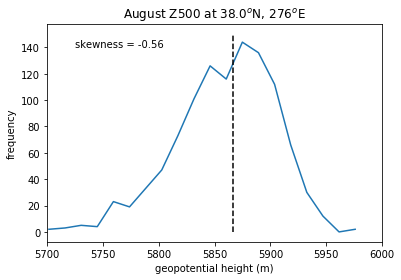

In [11]:
### Plot the distribution of sample means obtained by sub-sampling.
h, bins = np.histogram(X,20)
plt.plot(bins[:-1],h)

plt.xlabel('geopotential height (m)');
plt.ylabel('frequency');
plt.plot([np.mean(X), np.mean(X)],[0., 150],'--', color = 'black');
plt.title('August Z500 at ' + str(np.round(LAT)) + '$^o$N, ' + str(round(LONG)) + '$^o$E');
Z = (X-np.mean(X))/np.std(X);
plt.text(5725, 140, 'skewness = ' + str(round(stats.skew(Z[:]), 2))) ;
plt.xlim(5700, 6000);

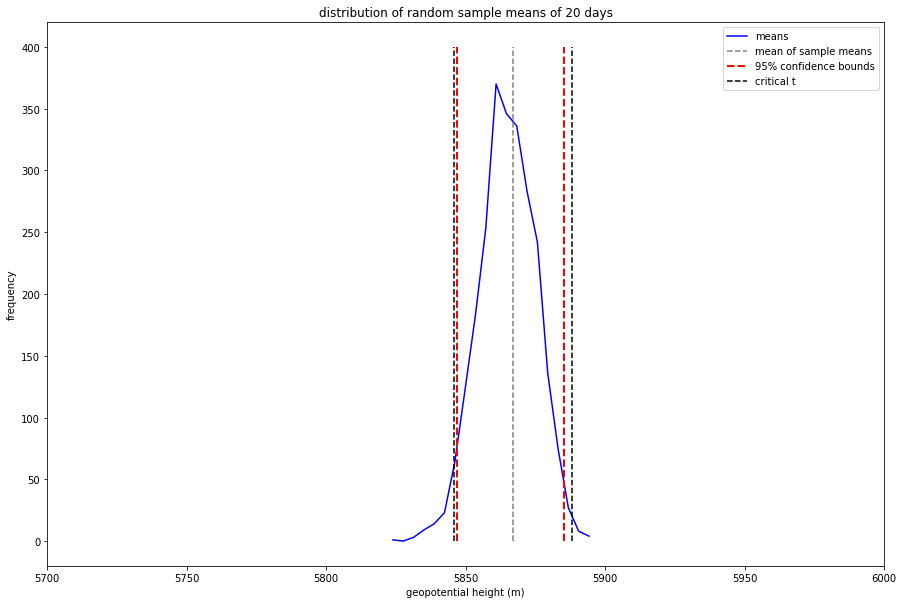

In [15]:
f=plt.figure(figsize=(15,10))
mp = 0.
h, bins = np.histogram(P-mp,20);
plt.plot(bins[:-1],h, color = 'blue', label = 'means');
plt.plot((np.mean(X), np.mean(X)),(0., 400),'--', color = 'grey', label = 'mean of sample means');

a1 = np.percentile(P-mp,2.5);
a2 = np.percentile(P-mp,100.-2.5);
plt.plot((a1,a1),(0,400),'--',color = 'red', linewidth = 2, label = '95% confidence bounds')
plt.plot((a2,a2),(0,400),'--',color = 'red', linewidth = 2)
t_inc = (stats.t.ppf(0.975, sample_length - 1))*np.std(X)/np.sqrt(sample_length-1)

plt.plot(np.ones((2,))*(np.mean(X)-t_inc), (0,400), '--',color = 'black', label = 'critical t');
plt.plot(np.ones((2,))*(np.mean(X)+t_inc), (0,400), '--',color = 'black');

plt.legend(fontsize = 10);
plt.xlabel('geopotential height (m)');
plt.ylabel('frequency');
plt.title('distribution of random sample means of ' + str(sample_length) + ' days');
plt.xlim(5700, 6000);

In [16]:
### Check if your results are significant at the 95% confidence level
### In other words - is your average geopotential height when you have aerosol
### formation outside of 95% confidence interval?
### You should find that it is, enabling you to reject the null hypothesis.
### Null Hypothesis = your sample mean is not diferent than the population mean.
print('min 95% confidence interval - geopotential height (m):',round(np.mean(X)-t_inc,0))
print('max 95% confidence interval - geopotential height (m):',round(np.mean(X)+t_inc,0))
print('value we are testing - geopotential height (m)',5900)

min 95% confidence interval - geopotential height (m): 5846.0
max 95% confidence interval - geopotential height (m): 5888.0
value we are testing - geopotential height (m) 5900
